In [1]:
import sys
sys.path.append('../../..')

In [2]:
import pathlib

PATH_INPUTS = pathlib.Path('inputs') 

PATH_DATASET = pathlib.Path('dataset')
PATH_DATASET_NPY = PATH_DATASET / 'npy'
PATH_DATASET_PNG = PATH_DATASET / 'png'

if not(PATH_DATASET.exists()):
    PATH_DATASET.mkdir()

if not(PATH_DATASET_NPY.exists()):
    PATH_DATASET_NPY.mkdir()

if not(PATH_DATASET_PNG.exists()):
    PATH_DATASET_PNG.mkdir()

## Dataset Generation

In [3]:
import lasp.filters.linear
import lasp.noise
import lasp.io
import lasp.convert

import pathlib

import numpy

import scipy.signal
import scipy.io

import matplotlib.pyplot


filenames = [
    PATH_INPUTS / 'Baboon.bmp',
    PATH_INPUTS / 'Boats.bmp',
    PATH_INPUTS / 'Cameraman.bmp',
    PATH_INPUTS / 'Goldhill.bmp',
    PATH_INPUTS / 'Peppers.bmp'
]

NB_IMAGES = len(filenames)

imgs = [ lasp.io.read(image_path=filename).astype(dtype=numpy.double) for filename in filenames ]

kernel = lasp.filters.linear.gaussian_filter(size=15, sigma=3)
imgs_blurred = [ scipy.signal.convolve2d(img, kernel, mode='same') for img in imgs ]

SNR = 20
imgs_noised = [ lasp.noise.awgn(img, SNR) for img in imgs_blurred ]



print('SNR :', SNR)
print('NB_IMAGES :', NB_IMAGES)
# for i in range(0, NB_IMAGES):
#     print(imgs[i].shape, imgs_blurred[i].shape, imgs_noised[i].shape)

SNR : 20
NB_IMAGES : 5


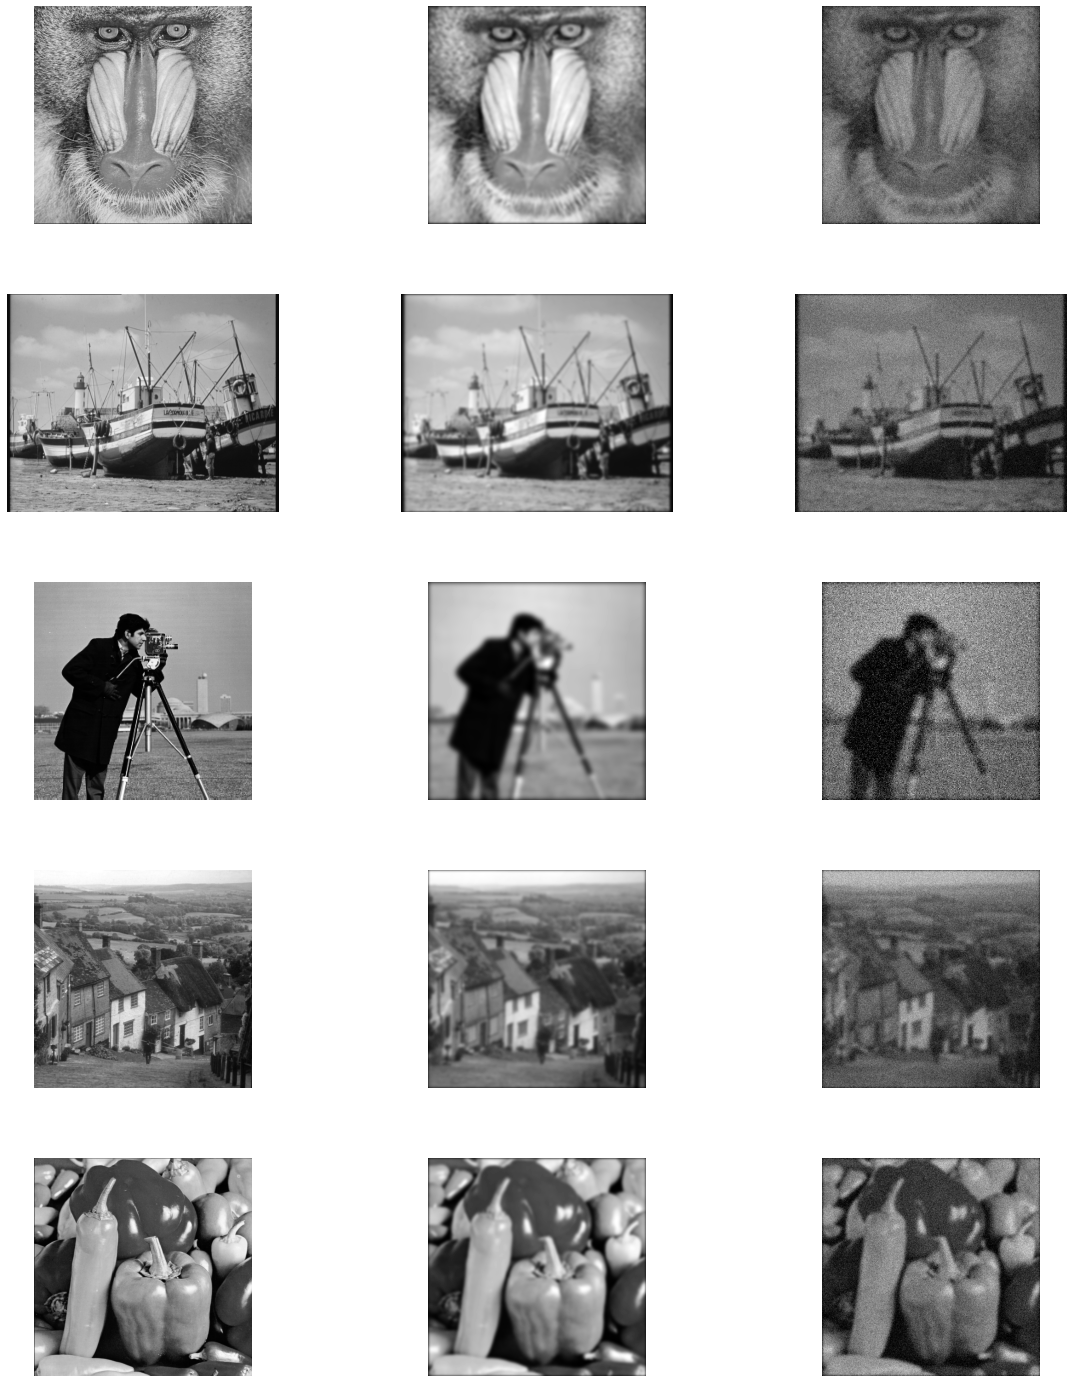

In [4]:


# figure = matplotlib.pyplot.figure(figsize=(15, 15), dpi=130)


# for i in range(0, NB_IMAGES):

#     original = imgs[i]
#     blurred = imgs_blurred[i]
#     noised = imgs_noised[i]


#     matplotlib.pyplot.subplot(NB_IMAGES, 3, i*3+1)
#     matplotlib.pyplot.axis('off')
#     if(i == 0):
#         matplotlib.pyplot.title('Original')
#     matplotlib.pyplot.imshow(original, cmap='gray')
    

#     matplotlib.pyplot.subplot(NB_IMAGES, 3, i*3+2)
#     matplotlib.pyplot.axis('off')
#     if(i == 0):
#         matplotlib.pyplot.title('Blurred')
#     matplotlib.pyplot.imshow(blurred, cmap='gray')

#     matplotlib.pyplot.subplot(NB_IMAGES, 3, i*3+3)
#     matplotlib.pyplot.axis('off')
#     if(i == 0):
#         matplotlib.pyplot.title('Noised')
#     matplotlib.pyplot.imshow(noised, cmap='gray')

# matplotlib.pyplot.show()


figure = matplotlib.pyplot.figure(figsize=(20, 20))
subfigure = figure.subfigures(NB_IMAGES, 1)

for i in range(0, NB_IMAGES):

    original = imgs[i]
    blurred = imgs_blurred[i]
    noised = imgs_noised[i]

    ax = subfigure[i].subplots(1, 3)

    ax[0].axis('off')
    ax[0].imshow(original, cmap='gray')
    ax[1].axis('off')
    ax[1].imshow(blurred, cmap='gray')
    ax[2].axis('off')
    ax[2].imshow(noised, cmap='gray')

matplotlib.pyplot.show()
   


## Save dataset

In [5]:
lasp.io.save(kernel, PATH_DATASET_NPY / 'kernel.npy')
lasp.io.save(kernel, PATH_DATASET_PNG / 'kernel.png')

for i in range(0, NB_IMAGES):

    original = imgs[i]
    blurred = imgs_blurred[i]
    noised = imgs_noised[i]
    
    name = filenames[i].stem

    lasp.io.save(original, PATH_DATASET_NPY / (name+'Original'+'.npy'))
    lasp.io.save(blurred, PATH_DATASET_NPY / (name+'Blurred'+'.npy'))
    lasp.io.save(noised, PATH_DATASET_NPY / (name+'Noised'+'.npy'))

    lasp.io.save(original, PATH_DATASET_PNG / (name+'Original'+'.png'))
    lasp.io.save(blurred, PATH_DATASET_PNG / (name+'Blurred'+'.png'))
    lasp.io.save(noised, PATH_DATASET_PNG / (name+'Noised'+'.png'))